In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
def loadDataSet(fileName):
    return np.loadtxt(fileName)
def distanceEuclid(vecA, vecB):
    return ((vecA - vecB) ** 2).sum() ** 0.5
def randCent(dataSet, k):
    m, n = dataSet.shape
    centroids = np.zeros((k, n))
    for j in range(n):
        minJ = min(dataSet[:, j])
        maxJ = max(dataSet[:, j])
        rangeJ = maxJ - minJ
        centroids[:, j] = minJ + rangeJ * np.random.rand(k)
    return centroids
def KMeans(dataSet, k, distanceType = distanceEuclid, centroidType = randCent):
    m, n =  dataSet.shape
    centroids = centroidType(dataSet, k)
    assemblage = np.zeros((m, 2)) # closest centroid index and distance for each i
    cenFlag = True
    while cenFlag:
        cenFlag = False
        for i in range(m):
            bestIndex = -1
            minDistance = np.Inf
            for j in range(k):
                distanceJI = distanceType(centroids[j, :], dataSet[i, :])
                if minDistance > distanceJI:
                    minDistance = distanceJI
                    bestIndex = j
            if assemblage[i, 0] != bestIndex:
                cenFlag = True
            assemblage[i, :] = bestIndex, minDistance
        for cen in range(k):
            centroids[cen, :] = dataSet[np.nonzero(assemblage[:, 0] == cen)[0]].mean(0)
    return centroids, assemblage
def BiKMean(dataSet, k, distanceType = distanceEuclid):
    m, n = dataSet.shape
    clusters = [dataSet.mean(0).tolist()]
    assemblage = np.zeros((m, 2))
    for i in range(m):
        assemblage[i, 1] = distanceType(clusters[0], dataSet[i, :])
    while len(clusters) < k:
        lowestSSE = np.Inf
        for i in range(len(clusters)):
            try:
                tempCentroid, tempAssemblage = KMeans(dataSet[np.nonzero(assemblage[:, 0] == i)[0], :], 2, distanceType)
            except:
                continue
            SSE = tempAssemblage.sum(0)[1] + assemblage[np.nonzero(assemblage[:, 0] != i)[0]].sum(0)[1]
            if SSE < lowestSSE:
                lowestSSE = SSE
                bestIndexCluster = i
                bestCentroids = tempCentroid
                bestAssemblage = tempAssemblage.copy()
        bestAssemblage[np.nonzero(bestAssemblage[:, 0] == 1)[0], 0] = len(clusters)
        bestAssemblage[np.nonzero(bestAssemblage[:, 0] == 0)[0], 0] = bestIndexCluster
        clusters[bestIndexCluster] = bestCentroids[0, :]
        clusters.append(bestCentroids[1, :])
        assemblage[np.nonzero(assemblage[:, 0] == bestIndexCluster)[0], :] = bestAssemblage
    return clusters, assemblage

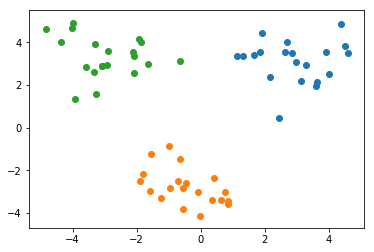

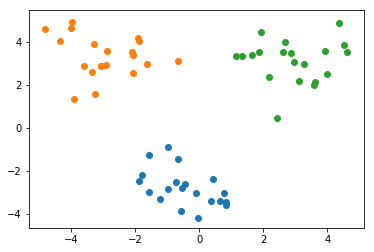

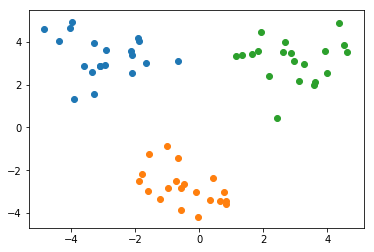

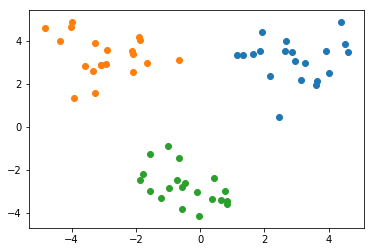

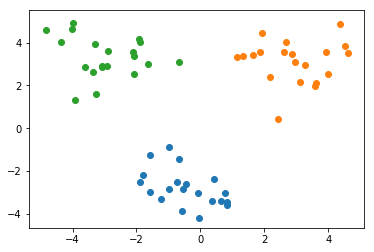

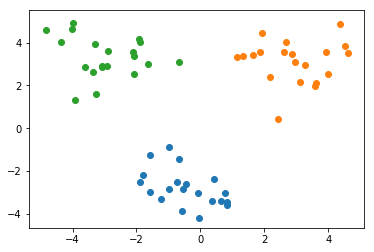

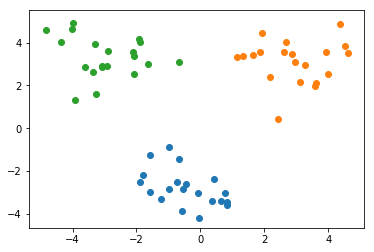

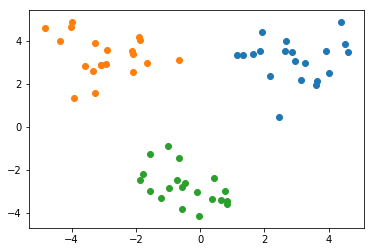

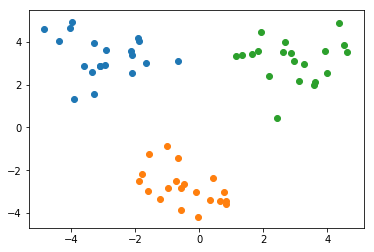

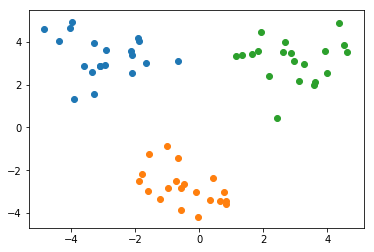

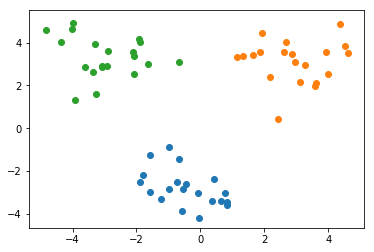

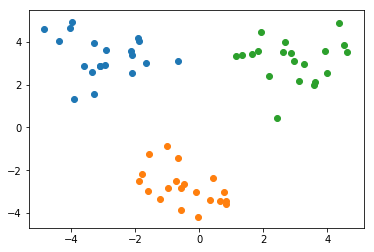

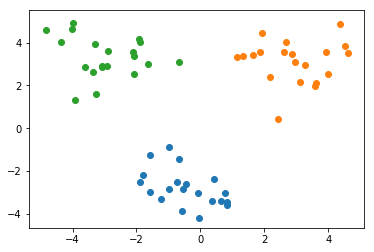

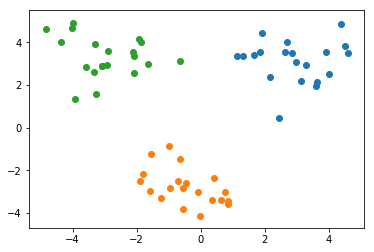

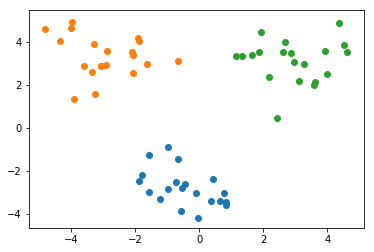

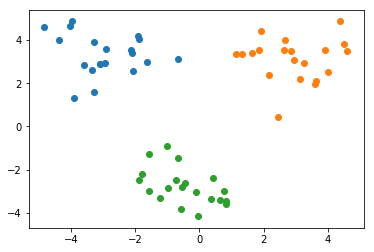

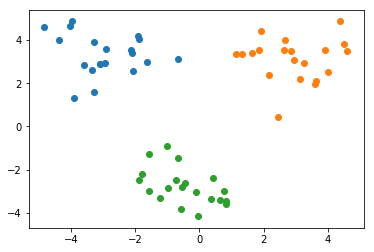

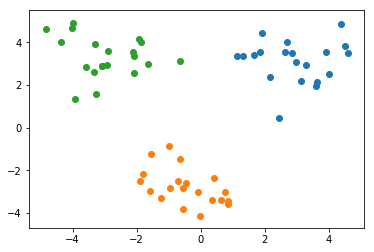

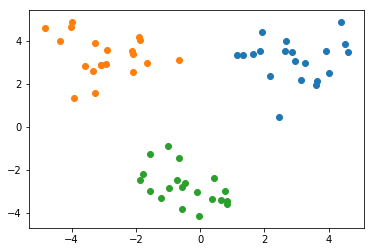

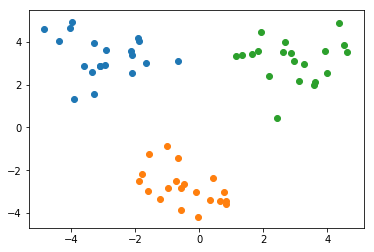

In [5]:
dataSet = loadDataSet('testSet2.txt')
k = 3
for i in range(20):
    cen, assem = BiKMean(dataSet, k)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        ax.scatter(dataSet[np.nonzero(assem[:, 0] == i)[0], 0], dataSet[np.nonzero(assem[:, 0] == i)[0], 1])
    plt.show()